# Imports

In [1]:
from src.trade_logic.AverageCrossLogic import AverageCrossLogic
from src.models.Trade import Trade
from src.Backtest import Backtest
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

# Backtest

In [2]:
from src.indicators.MovingAverage import MovingAverage
from src.utils.TimeToTrade import TimeToTrade

###################################################################
#                              BACKTEST                           #
###################################################################

## Backtest
input_limit_history=100
plot_reports=False
input_timeframe=Backtest.ENUM_TIMEFRAME_M5

###################################################################
#                               INPUTS                            #
###################################################################

## Trade configurations
input_symbol='WIN$N'
input_qty=1
input_take_stop_calc_type=Trade.ENUM_TAKE_STOP_CALC_TYPE_PTS
input_stop_loss=300
input_take_profit=600

## Indicators configurations
    # Fast Moving Average
input_fast_ma_calc_type=MovingAverage.ENUM_AVERAGE_TYPE_SMA
input_fast_period=20
    # Slow Moving Average
input_slow_ma_calc_type=MovingAverage.ENUM_AVERAGE_TYPE_SMA
input_slow_period=200

## Time to trade configurations
input_time_to_open_trades='10:30:00'
input_time_to_stop_opening_trades='15:00:00'
input_time_to_close_trades='17:00:00'

###################################################################

# Build trade logic
tl = AverageCrossLogic(input_qty,ENUM_TAKE_STOP_CALC_TYPE=input_take_stop_calc_type,stop_loss=input_stop_loss,take_profit=input_take_profit,
    INPUTS=AverageCrossLogic.INPUTS(
        fast_ma_inputs=MovingAverage.INPUTS(input_fast_ma_calc_type,input_fast_period),
        slow_ma_inputs=MovingAverage.INPUTS(input_slow_ma_calc_type,input_slow_period),
        trading_time=TimeToTrade(input_time_to_open_trades, input_time_to_stop_opening_trades, input_time_to_close_trades)
    )
)

# Call backtest
bt = Backtest(symbol=input_symbol,ENUM_TIMEFRAME=input_timeframe,trade_logic=tl,plot_report=plot_reports,limit_history=input_limit_history)

# Run backtest
if bt: trades=bt.run()

Connect Sucessfully (500, 4040, '20 Oct 2023')


# Report


					Trading test (WIN$N) backtest:

Gross profit: 			 856935.0			Winner trades: 		 1579
Gross loss: 			 -835500.0			Losing trades: 		 2854
Largest profit trade:		 600.0				Largest loss trade:	 -300.0
Average profit trade: 		 542.71				Average loss trade: 	 -292.75 

Profit trades (% of total): 	 35.6 %

Profit factor: 			 1.03
Sharpe Ratio: 			 0.01
Profit/Loss: 			 1.85
Total Net profit: 		 21435.0
Percentual return: 		 94.47 %

Number of trades: 		 4436
Bought trades: 			 2221
Sold trades: 			 2215 

Balance Drawdown Maximal: 	 22690.0
Balance Drawdown Maximal (%): 	 108.85
Balance Drawdown Maximal Time Range: 2020-03-26 10:50:00  until  2020-07-15 12:30:00


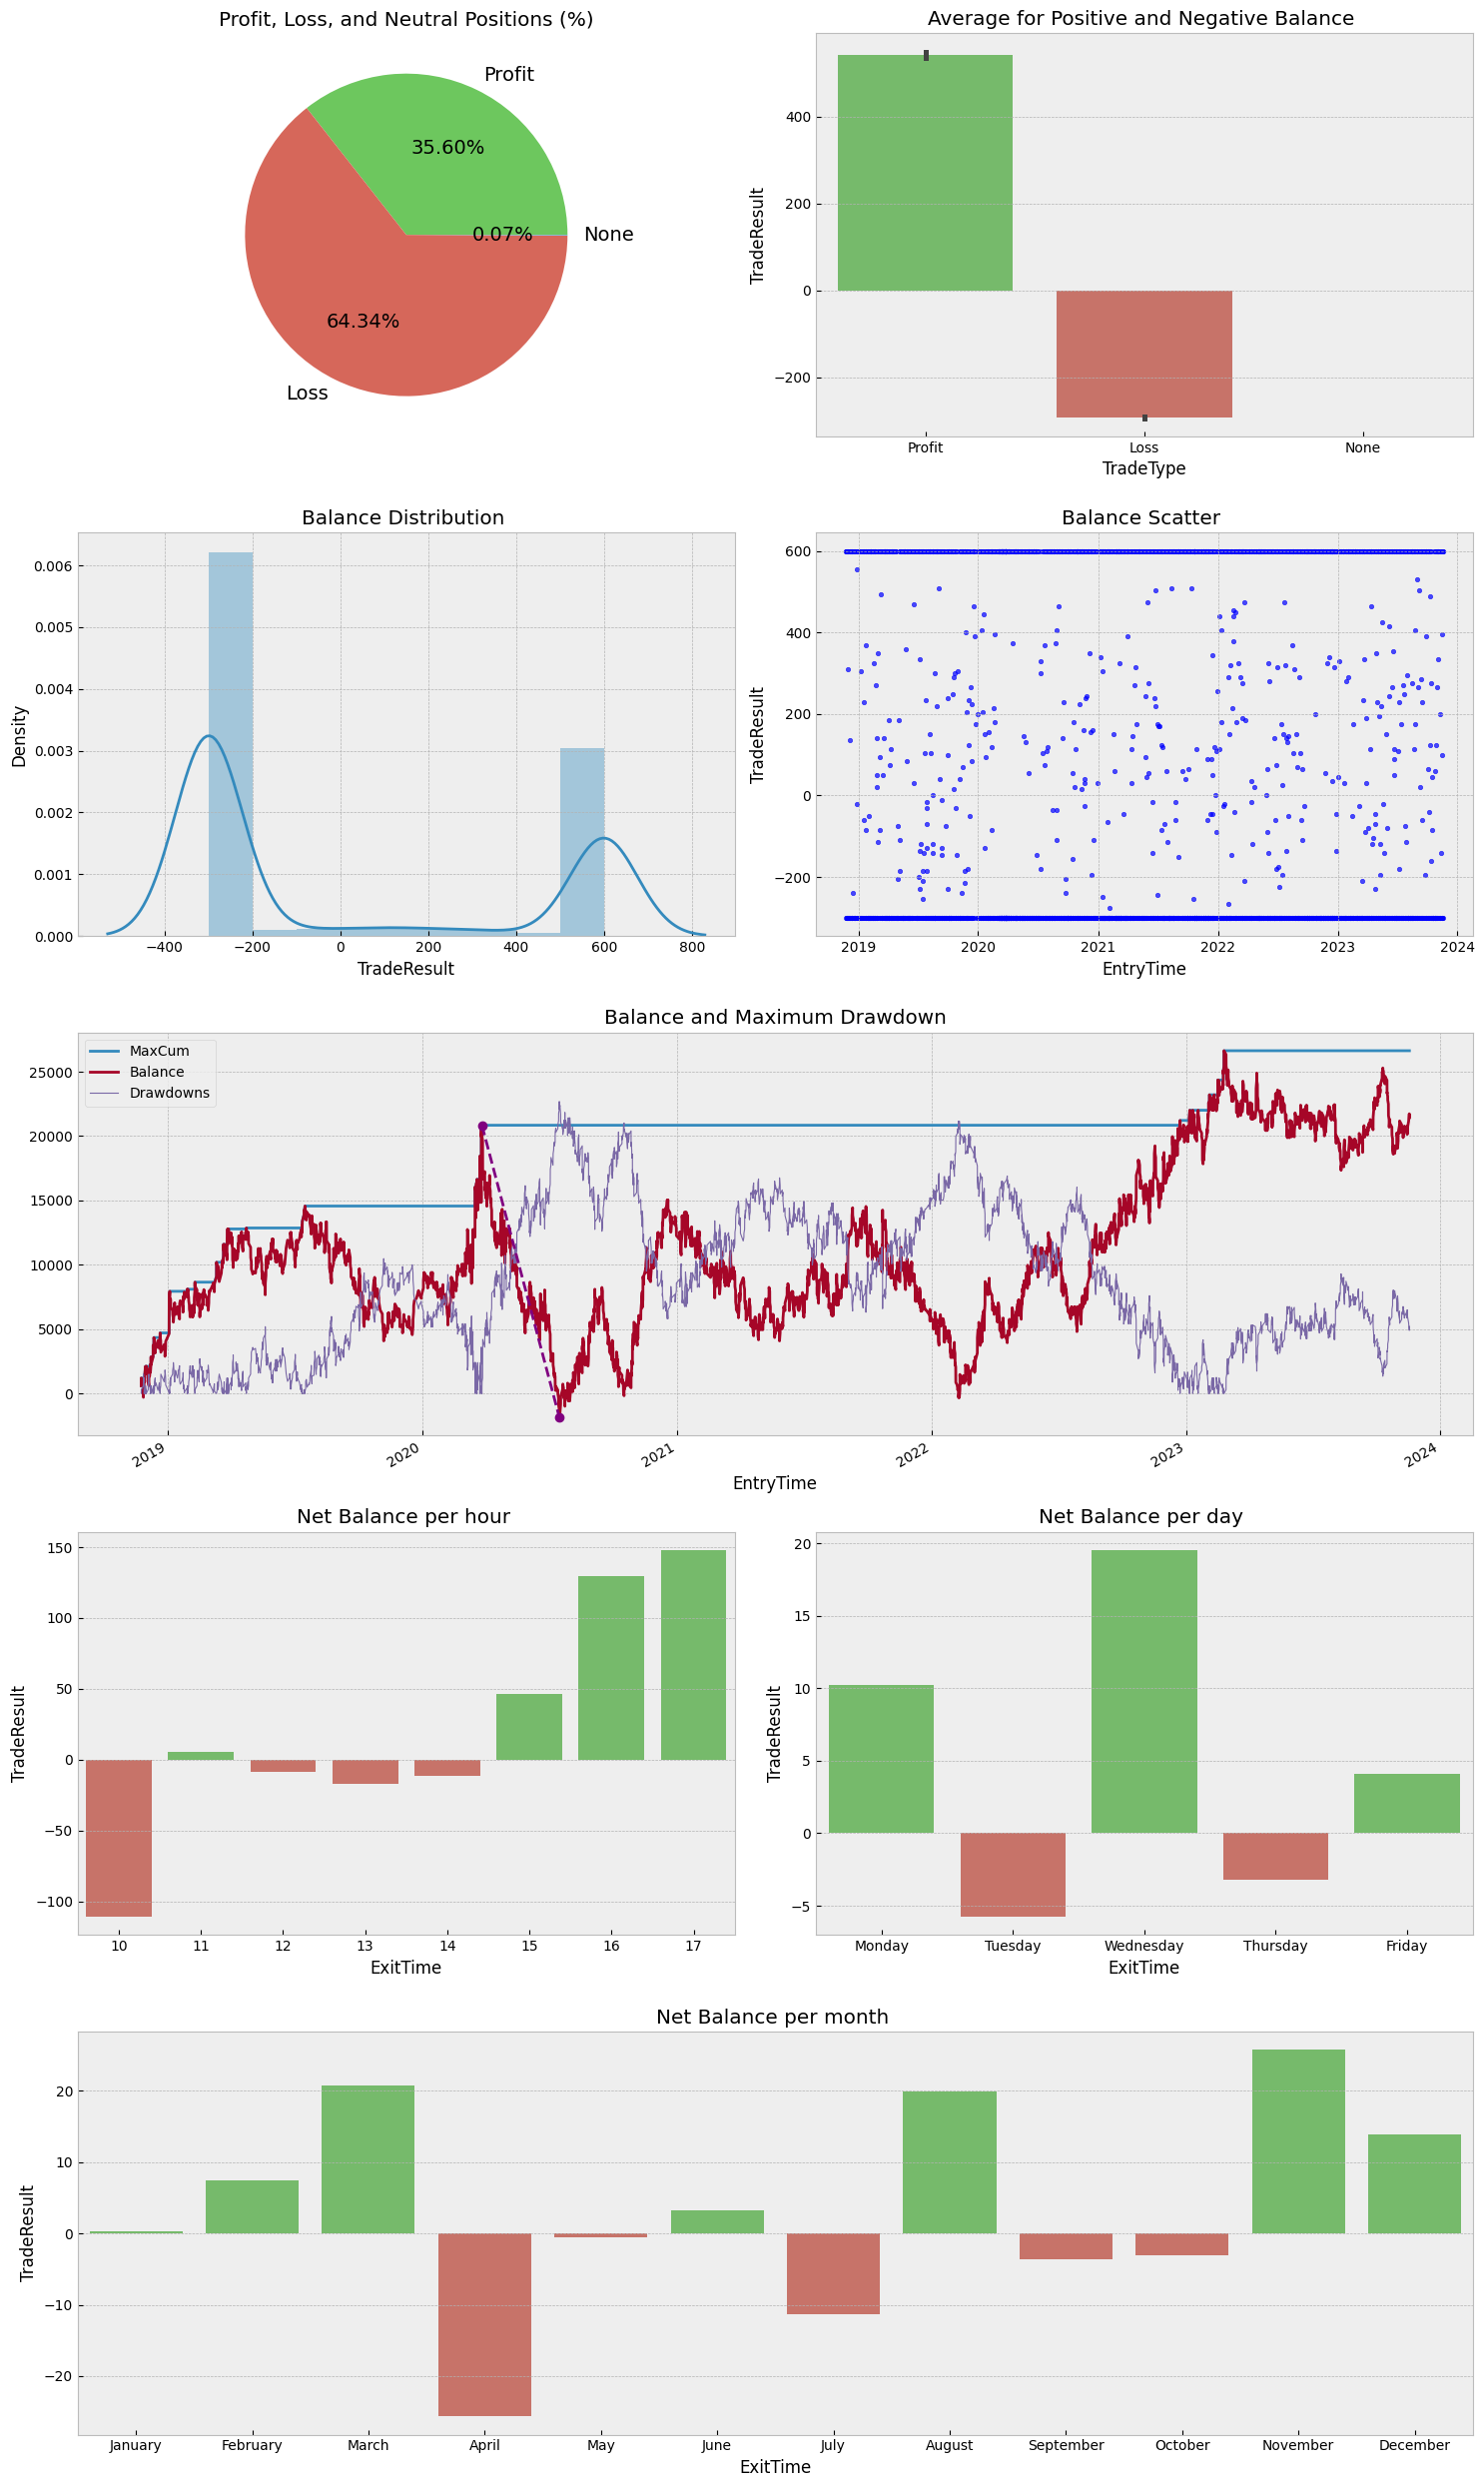

In [3]:
if not plot_reports: bt.get_report_pointer().plot_report()

# Optimizer

In [4]:
from src.optimizer.OptimizeOptions import OptimizeOptions
from src.optimizer.Optimizer import Optimizer

opt=Optimizer(
    symbol=input_symbol,
    ENUM_TIMEFRAME=input_timeframe,
    trade_logic=tl.optimize_possibilities(
        stop_loss=OptimizeOptions.float(300,500,100),
        take_profit=OptimizeOptions.float(500,800,100),
        # slow_ma_calc_type=OptimizeOptions.moving_average_calc_type(),
        # slow_ma_period=OptimizeOptions.int(8,12,1),
        # fast_ma_calc_type=OptimizeOptions.moving_average_calc_type(),
        # fast_ma_period=OptimizeOptions.int(20,30,5),
        time_to_open_trades=OptimizeOptions.time('09:00:00','10:00:00', 60*30),
        time_to_stop_open=OptimizeOptions.time('14:00:00','16:00:00', 60*30),
        time_to_close_trades=OptimizeOptions.time('17:30:00','18:00:00', 60*30)
    ),
    limit_history=100,
    df_to_opt=bt.get_bt_df()
)
opt.run()

Max result

In [5]:
opt.get_max_result_bt()['inpts']

{'qty': 1,
 'ENUM_TAKE_STOP_CALC_TYPE': 'PTS',
 'stop_loss': 400,
 'take_profit': 500,
 'fast_ma_ENUM_AVERAGE_TYPE': 'SMA',
 'fast_ma_period': 20,
 'slow_ma_ENUM_AVERAGE_TYPE': 'SMA',
 'slow_ma_period': 200,
 'time_to_open_trades': '10:00:00',
 'time_to_stop_open': '14:00:00',
 'time_to_close_trades': '17:30:00'}


					Trading opt/133 (WIN$N) backtest:

Gross profit: 			 928845.0			Winner trades: 		 1942
Gross loss: 			 -897170.0			Losing trades: 		 2316
Largest profit trade:		 500.0				Largest loss trade:	 -400.0
Average profit trade: 		 478.29				Average loss trade: 	 -387.38 

Profit trades (% of total): 	 45.6 %

Profit factor: 			 1.04
Sharpe Ratio: 			 0.02
Profit/Loss: 			 1.23
Total Net profit: 		 31675.0
Percentual return: 		 151.05 %

Number of trades: 		 4259
Bought trades: 			 2152
Sold trades: 			 2107 

Balance Drawdown Maximal: 	 20970.0
Balance Drawdown Maximal (%): 	 85.35
Balance Drawdown Maximal Time Range: 2020-03-27 10:15:00  until  2020-10-26 11:50:00


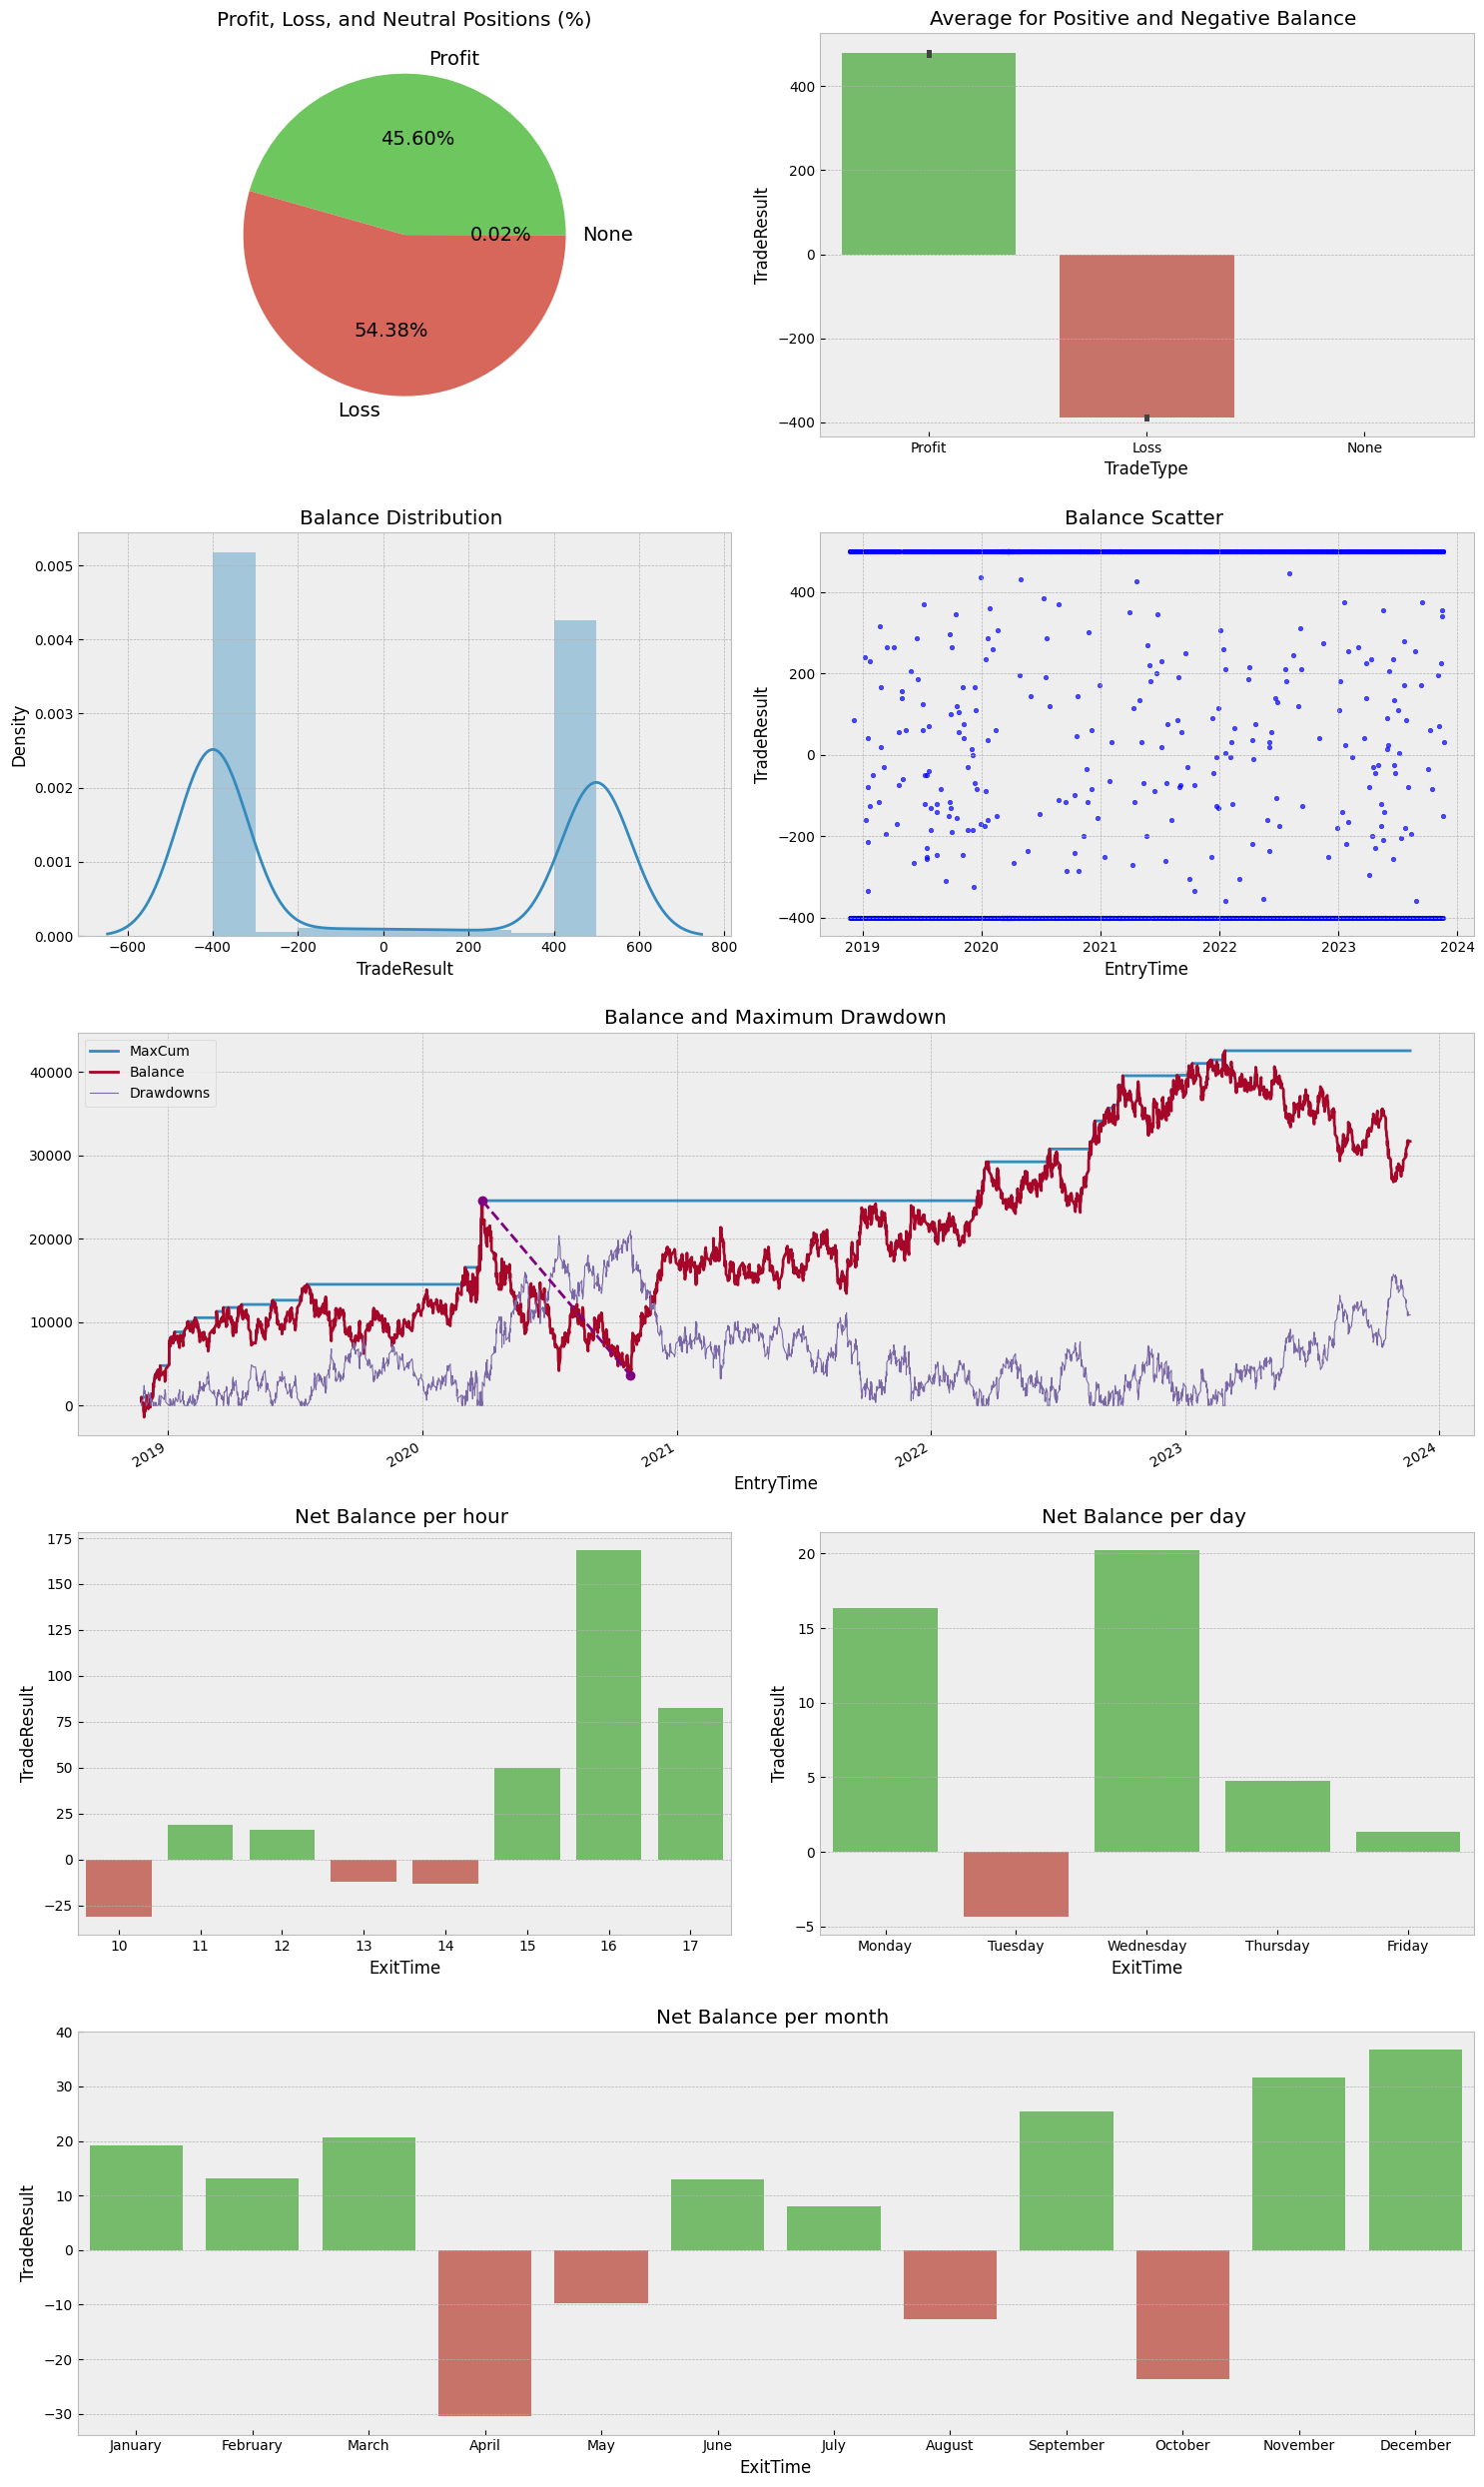

In [6]:
opt.get_max_result_bt()['bt'].get_report_pointer().plot_report()

Min drawdown

In [7]:
opt.get_min_drawdown_bt()['inpts']

{'qty': 1,
 'ENUM_TAKE_STOP_CALC_TYPE': 'PTS',
 'stop_loss': 400,
 'take_profit': 500,
 'fast_ma_ENUM_AVERAGE_TYPE': 'SMA',
 'fast_ma_period': 20,
 'slow_ma_ENUM_AVERAGE_TYPE': 'SMA',
 'slow_ma_period': 200,
 'time_to_open_trades': '10:00:00',
 'time_to_stop_open': '15:00:00',
 'time_to_close_trades': '18:00:00'}


					Trading opt/117 (WIN$N) backtest:

Gross profit: 			 1057500.0			Winner trades: 		 2156
Gross loss: 			 -1041560.0			Losing trades: 		 2674
Largest profit trade:		 500.0				Largest loss trade:	 -400.0
Average profit trade: 		 490.49				Average loss trade: 	 -389.51 

Profit trades (% of total): 	 44.64 %

Profit factor: 			 1.02
Sharpe Ratio: 			 0.01
Profit/Loss: 			 1.26
Total Net profit: 		 15940.0
Percentual return: 		 85.26 %

Number of trades: 		 4830
Bought trades: 			 2414
Sold trades: 			 2416 

Balance Drawdown Maximal: 	 18695.0
Balance Drawdown Maximal (%): 	 109.78
Balance Drawdown Maximal Time Range: 2020-03-26 12:05:00  until  2022-02-10 10:40:00


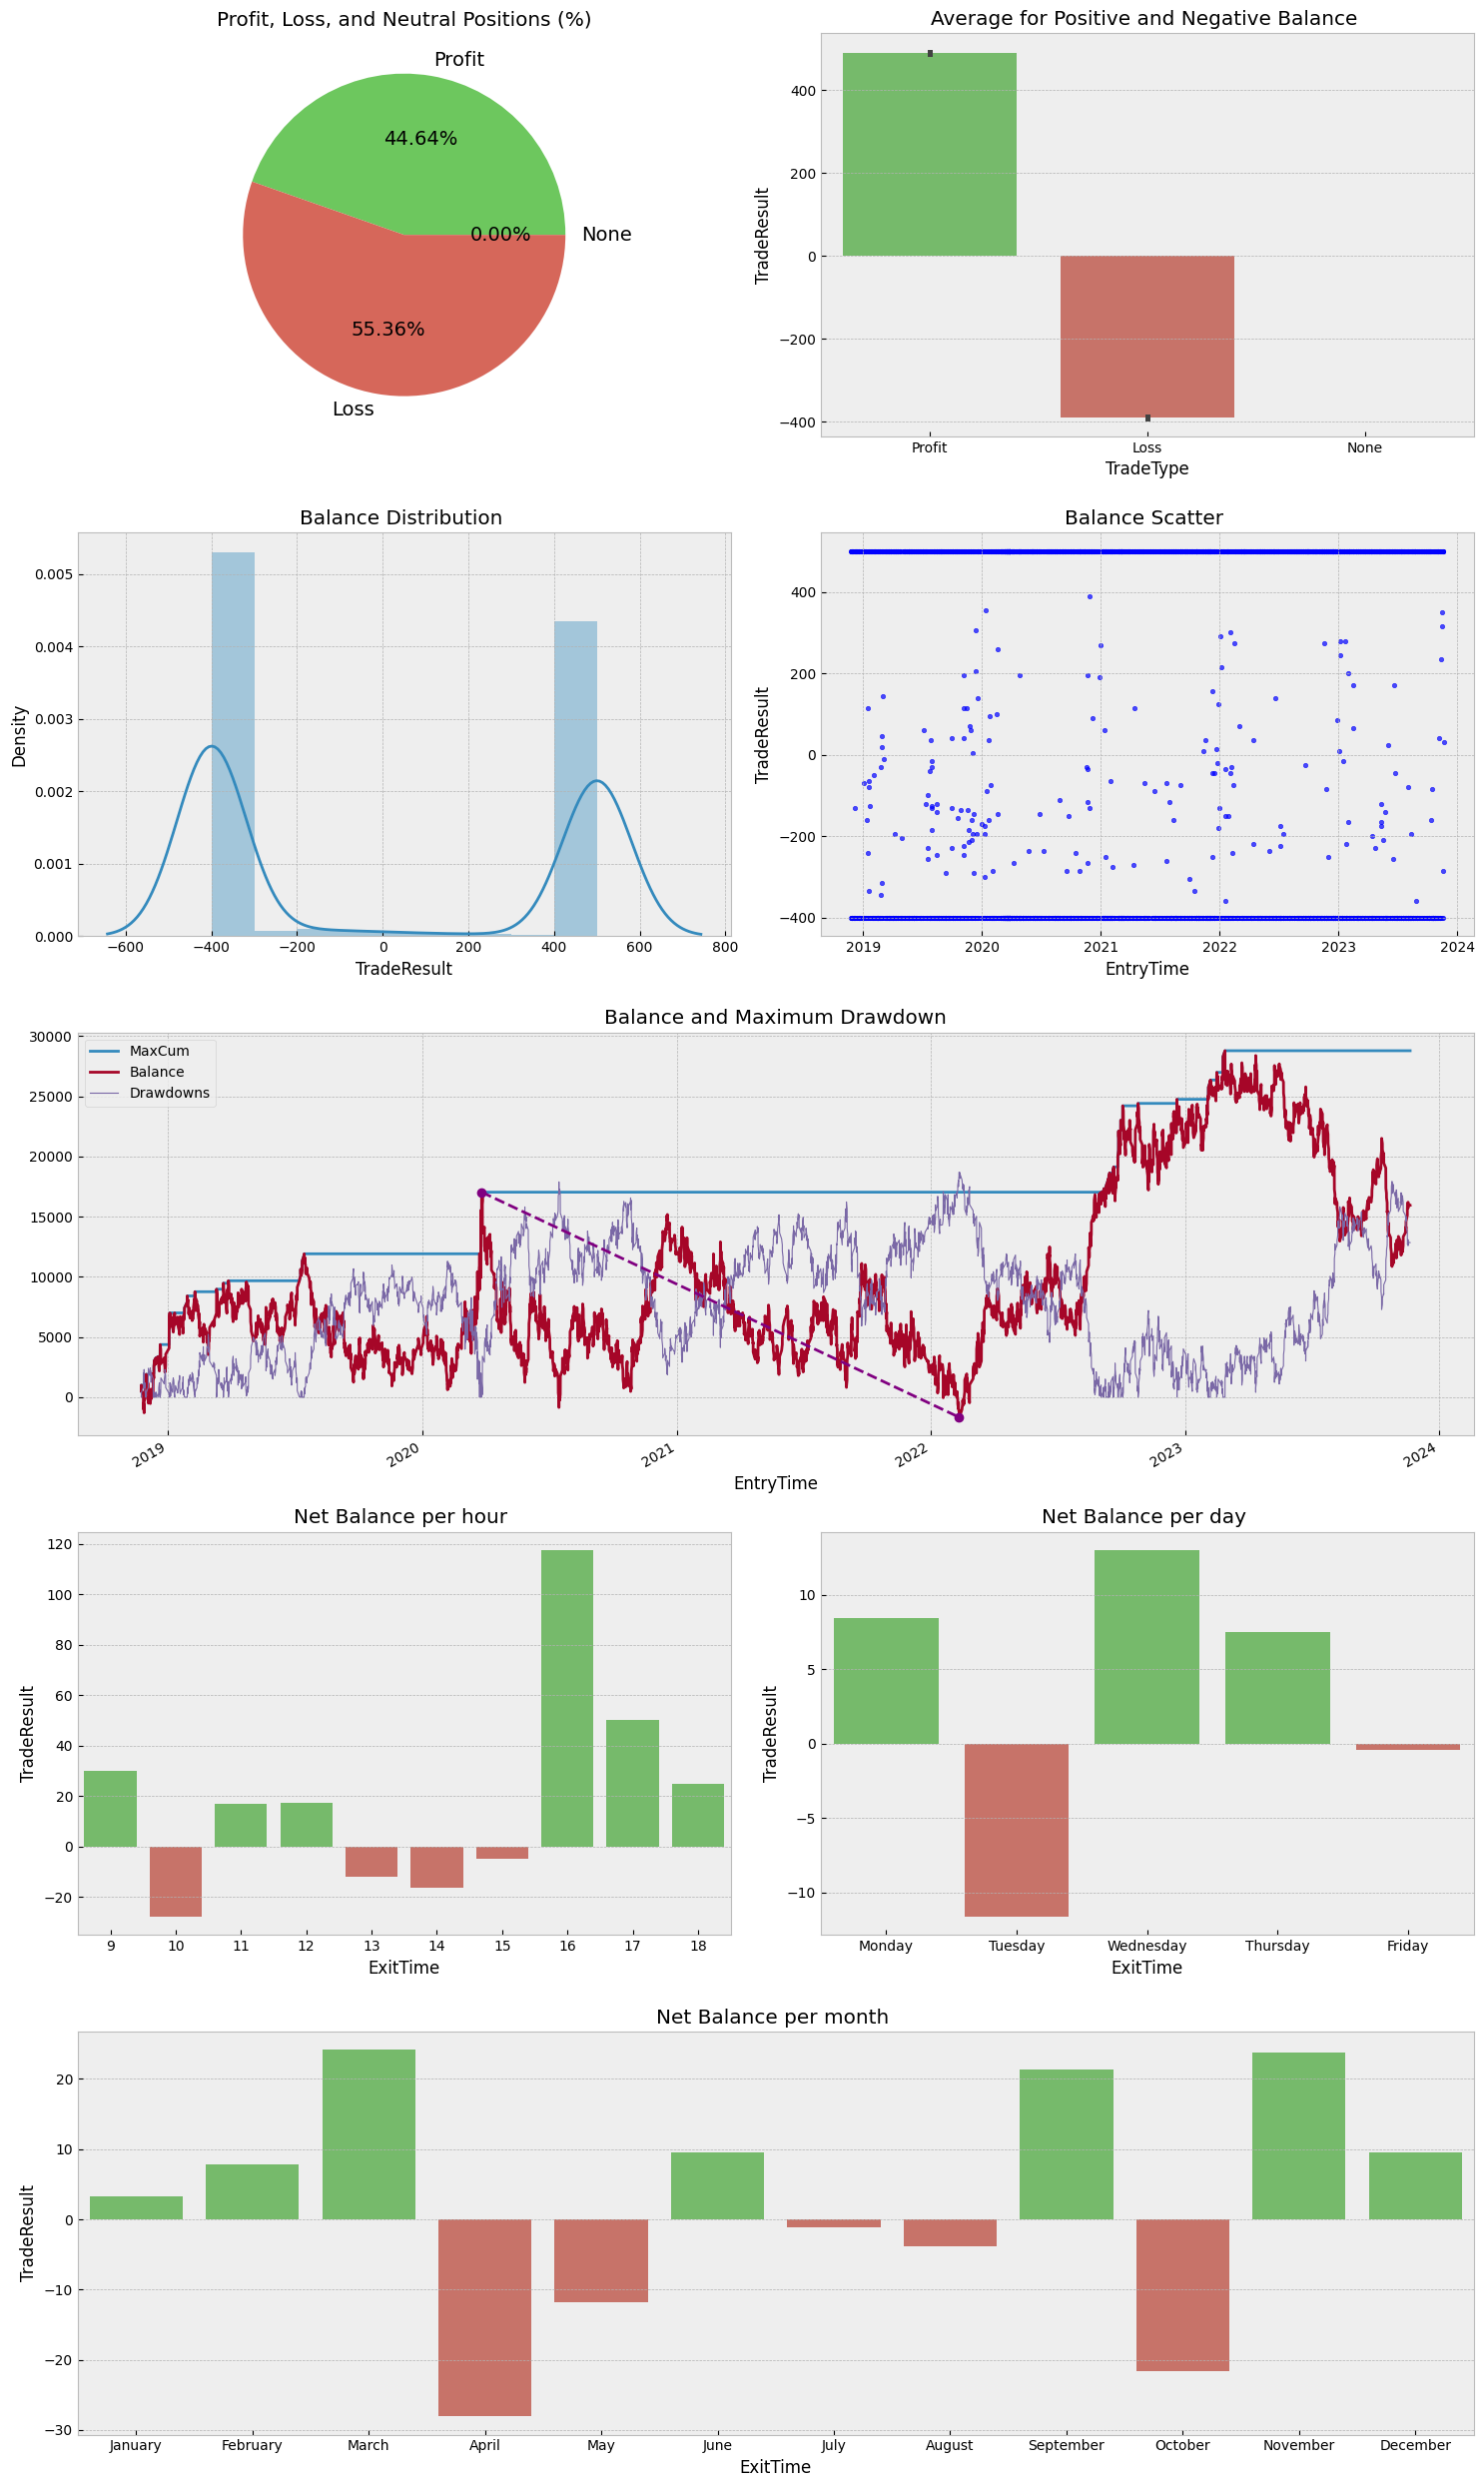

In [8]:
opt.get_min_drawdown_bt()['bt'].get_report_pointer().plot_report()

Max Sharpe Ratio

In [9]:
opt.get_max_sharpe_bt()['inpts']

{'qty': 1,
 'ENUM_TAKE_STOP_CALC_TYPE': 'PTS',
 'stop_loss': 400,
 'take_profit': 500,
 'fast_ma_ENUM_AVERAGE_TYPE': 'SMA',
 'fast_ma_period': 20,
 'slow_ma_ENUM_AVERAGE_TYPE': 'SMA',
 'slow_ma_period': 200,
 'time_to_open_trades': '10:00:00',
 'time_to_stop_open': '14:00:00',
 'time_to_close_trades': '17:30:00'}


					Trading opt/133 (WIN$N) backtest:

Gross profit: 			 928845.0			Winner trades: 		 1942
Gross loss: 			 -897170.0			Losing trades: 		 2316
Largest profit trade:		 500.0				Largest loss trade:	 -400.0
Average profit trade: 		 478.29				Average loss trade: 	 -387.38 

Profit trades (% of total): 	 45.6 %

Profit factor: 			 1.04
Sharpe Ratio: 			 0.02
Profit/Loss: 			 1.23
Total Net profit: 		 31675.0
Percentual return: 		 151.05 %

Number of trades: 		 4259
Bought trades: 			 2152
Sold trades: 			 2107 

Balance Drawdown Maximal: 	 20970.0
Balance Drawdown Maximal (%): 	 85.35
Balance Drawdown Maximal Time Range: 2020-03-27 10:15:00  until  2020-10-26 11:50:00


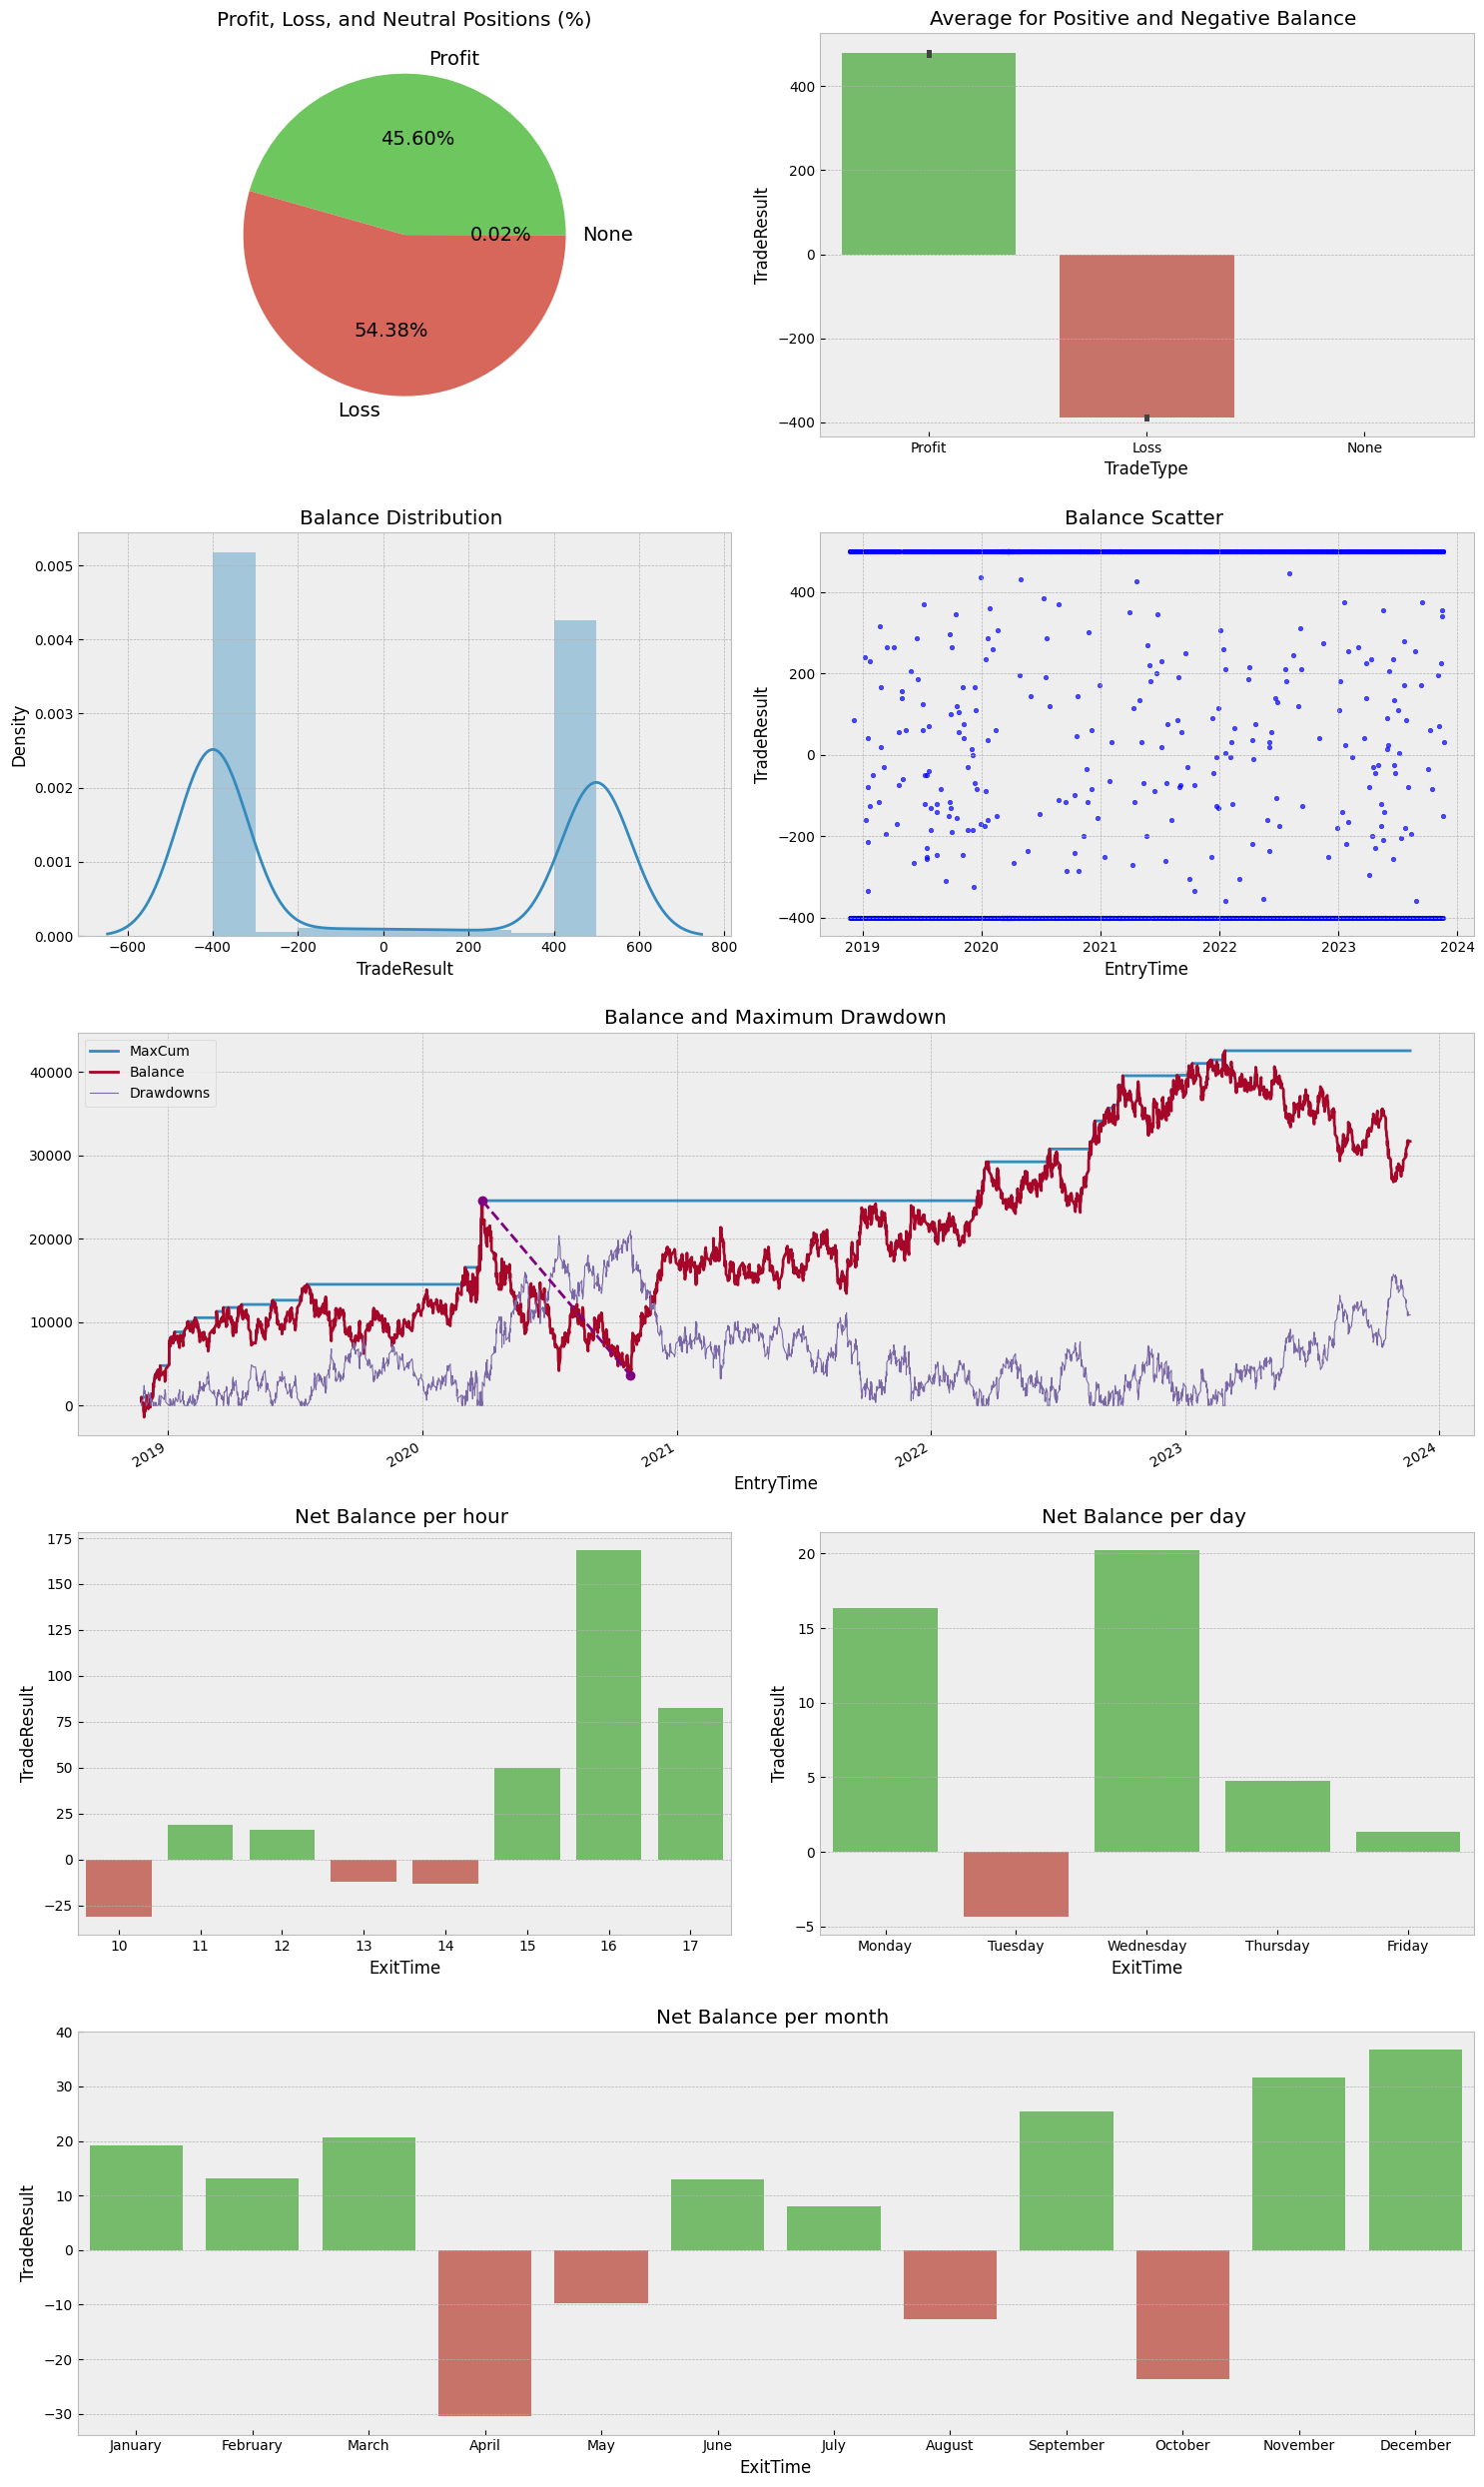

In [10]:
opt.get_max_sharpe_bt()['bt'].get_report_pointer().plot_report()

Max profit factor

In [11]:
opt.get_max_profit_factor_bt()['inpts']

{'qty': 1,
 'ENUM_TAKE_STOP_CALC_TYPE': 'PTS',
 'stop_loss': 400,
 'take_profit': 500,
 'fast_ma_ENUM_AVERAGE_TYPE': 'SMA',
 'fast_ma_period': 20,
 'slow_ma_ENUM_AVERAGE_TYPE': 'SMA',
 'slow_ma_period': 200,
 'time_to_open_trades': '10:00:00',
 'time_to_stop_open': '14:00:00',
 'time_to_close_trades': '17:30:00'}


					Trading opt/133 (WIN$N) backtest:

Gross profit: 			 928845.0			Winner trades: 		 1942
Gross loss: 			 -897170.0			Losing trades: 		 2316
Largest profit trade:		 500.0				Largest loss trade:	 -400.0
Average profit trade: 		 478.29				Average loss trade: 	 -387.38 

Profit trades (% of total): 	 45.6 %

Profit factor: 			 1.04
Sharpe Ratio: 			 0.02
Profit/Loss: 			 1.23
Total Net profit: 		 31675.0
Percentual return: 		 151.05 %

Number of trades: 		 4259
Bought trades: 			 2152
Sold trades: 			 2107 

Balance Drawdown Maximal: 	 20970.0
Balance Drawdown Maximal (%): 	 85.35
Balance Drawdown Maximal Time Range: 2020-03-27 10:15:00  until  2020-10-26 11:50:00


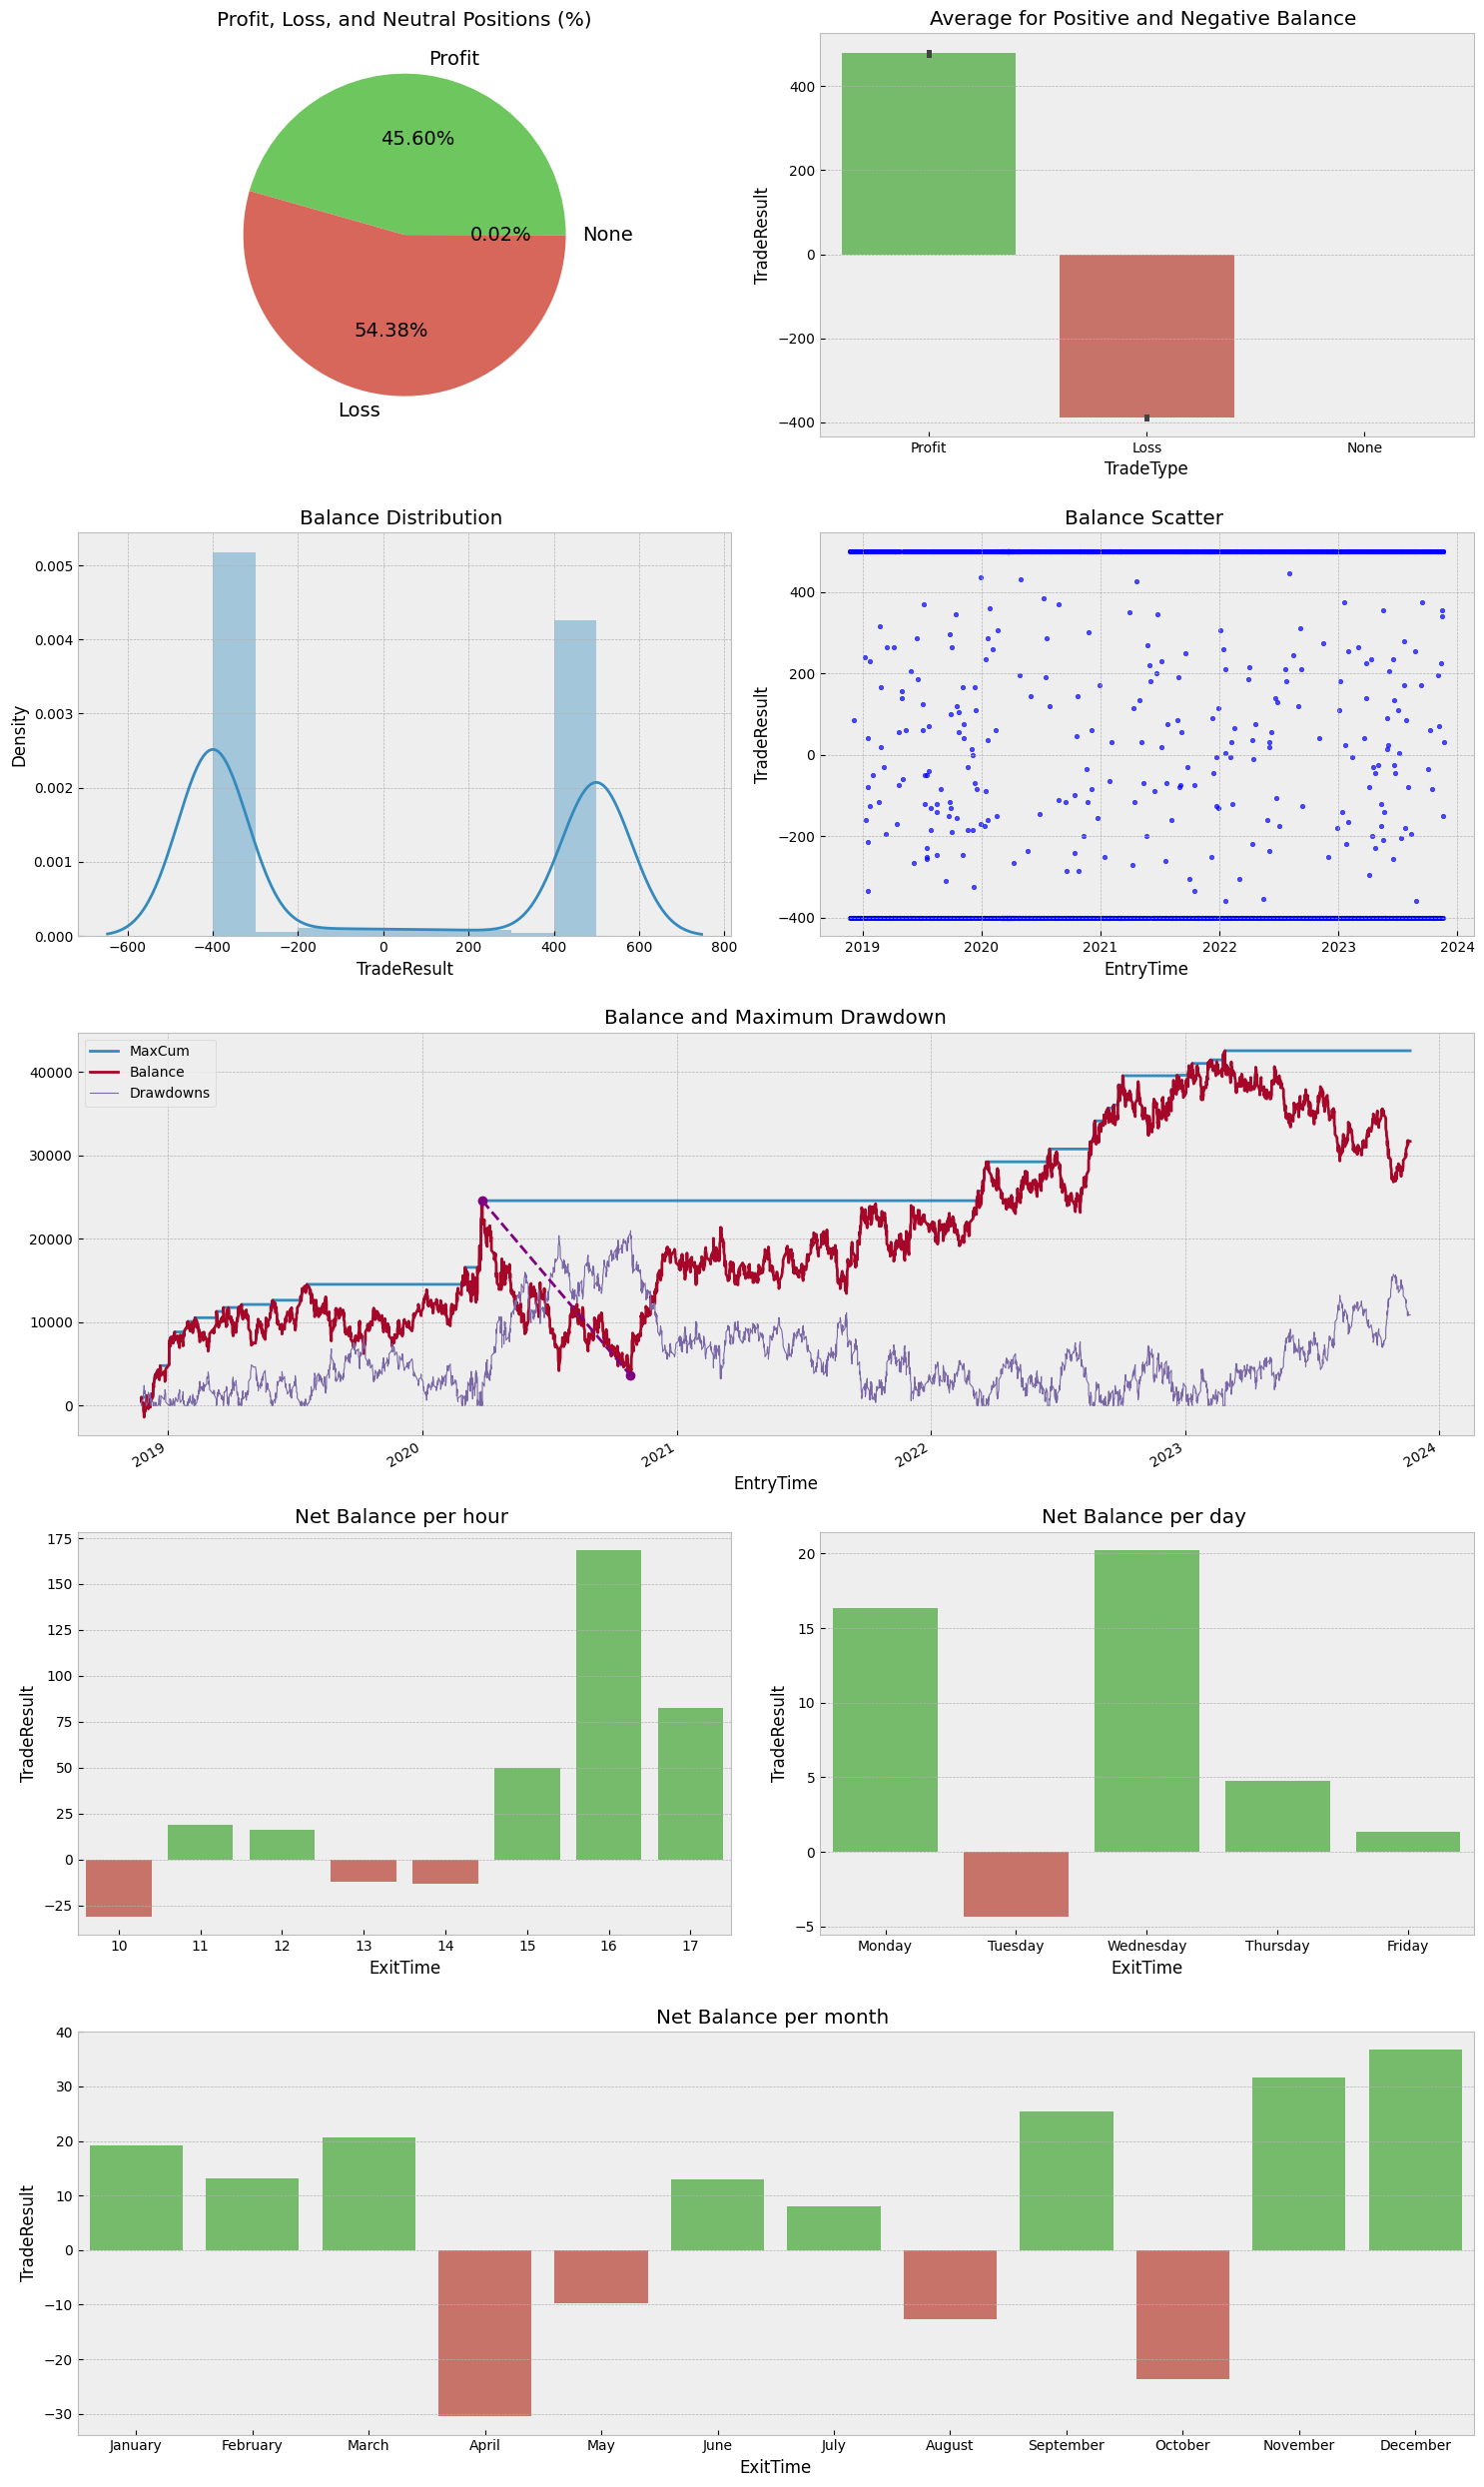

In [12]:
opt.get_max_profit_factor_bt()['bt'].get_report_pointer().plot_report()